,id,date,rate
0,1,1982-01-04,2.32
1,2,1982-01-05,2.24
2,3,1982-01-06,2.43
3,4,1982-01-07,2.46
4,5,1982-01-08,2.50


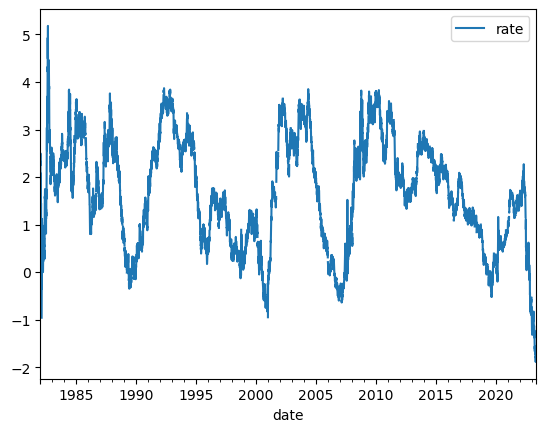

In [19]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('data/db.sqlite')
df = pd.read_sql_query("SELECT * FROM yield_curve", conn)
df["rate"] = pd.to_numeric(df["rate"], errors="coerce")
df["date"] = pd.to_datetime(df["date"])

df.plot(x="date", y="rate")
df.head()


In [21]:
df1 = pd.read_sql_query("SELECT * FROM sector_etfs", conn)
df1

,id,name,date,open,high,low,close,volume
0,1,XLY,05/24/23,149.38,149.930,147.99,149.15,982881
1,2,XLY,05/23/23,149.92,151.830,149.41,149.70,1143280
2,3,XLY,05/22/23,151.62,152.070,150.57,151.08,999034
3,4,XLY,05/19/23,152.46,152.530,150.79,151.55,952884
4,5,XLY,05/18/23,150.82,152.885,150.80,152.83,1121266
...,...,...,...,...,...,...,...,...
101141,101142,VNQ,10/13/04,51.48,51.480,51.48,51.48,500
101142,101143,VNQ,10/12/04,51.32,51.320,51.32,51.32,400
101143,101144,VNQ,10/11/04,51.18,51.180,51.18,51.18,400
101144,101145,VNQ,10/05/04,51.50,51.500,51.50,51.50,900
